# **ANÁLISE DE JOGADORES - FILTRO POR EFICIÊNCIA**

## **Estratégia**

1. Ordenar por eficiência (EFG %, REB % , AST %)
2. Encontrar jogadores top 25% (tendência a OVER)
3. Encontrar jogadores worst 10% (tendência a UNDER)
4. Filtro: com minutagem!

> **Dados** de [NBA STATS](https://www.nba.com/stats/players/advanced) -> MS Excel -> Python

In [36]:
#Bibliotecas
import numpy as np
import pandas as pd

from scipy.stats import poisson
from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


### **Dados**

In [37]:
%%writefile eff_nba_players.csv
RANK_ID;PLAYER;TEAM;AGE;GP;W;L;MIN;OFFRTG;DEFRTG;NETRTG;AST%;AST/TO;AST RATIO;OREB%;DREB%;REB%;TO RATIO;EFG%;TS%;USG%;PACE;PIE;POSS
1;Tyrese Maxey;PHI;24;7;1;6;39.7;107.6;118.8;-11.2;19.3;1.93;12.2;0.0;8.8;3.8;6.3;47.3;52.2;30.0;97.92;10.9;568
2;Kevin Durant;PHX;36;9;8;1;38.8;113.7;111.0;2.7;15.5;1.03;12.7;0.6;15.1;8.6;12.2;62.7;67.0;27.3;99.50;14.8;722
3;Nikola Jokic;DEN;29;10;7;3;38.1;125.8;114.5;11.3;46.4;2.85;30.6;12.1;23.1;17.8;10.7;62.0;66.7;28.3;100.98;21.4;805
4;Mikal Bridges;NYK;28;11;5;6;38.0;118.6;119.1;-0.6;12.7;2.17;18.5;2.9;7.7;5.3;8.5;55.0;55.5;17.7;98.02;7.6;851
5;Luka Doncic;DAL;25;12;5;7;37.9;115.1;110.2;4.9;32.8;2.46;21.0;1.3;19.0;10.1;8.5;49.6;54.5;33.4;100.78;15.9;956
6;Keegan Murray;SAC;24;12;7;5;37.0;116.4;108.0;8.4;5.9;2.00;11.0;6.8;14.1;10.7;5.5;52.1;54.9;15.5;100.51;7.8;927
7;De'Aaron Fox;SAC;26;12;7;5;36.8;113.3;109.0;4.3;21.7;1.51;17.4;2.8;10.9;7.1;11.5;53.3;58.4;28.2;101.42;12.6;934
8;Michael Porter Jr.;DEN;26;10;7;3;36.8;121.3;115.1;6.2;10.9;2.64;15.3;3.5;15.3;9.4;5.8;58.5;60.1;17.7;100.86;10.0;774
9;Cade Cunningham;DET;23;13;5;8;36.8;110.8;112.4;-1.7;37.9;1.71;24.3;2.4;16.7;9.8;14.2;51.0;54.5;30.9;99.09;13.7;985
10;Jalen Johnson;ATL;22;12;5;7;36.7;113.5;115.4;-1.8;20.7;1.60;20.2;5.1;21.7;13.3;12.6;50.3;53.6;22.5;105.33;11.7;968
11;Anthony Edwards;MIN;23;12;6;6;36.6;113.5;111.0;2.5;17.9;1.13;12.4;1.2;12.7;7.1;11.0;57.7;60.0;31.0;99.32;13.3;909
12;Trae Young;ATL;26;11;4;7;36.6;114.7;116.6;-2.0;45.4;2.54;30.5;2.5;8.6;5.5;12.0;47.3;54.9;28.6;104.69;13.2;878
13;Devin Booker;PHX;28;12;9;3;36.5;111.0;111.7;-0.7;29.8;3.73;23.6;3.4;6.3;4.9;6.3;50.9;57.2;26.0;100.74;12.5;919
14;DeMar DeRozan;SAC;35;12;7;5;36.5;118.7;113.8;4.8;16.2;2.13;16.7;1.7;9.4;5.7;7.8;55.2;61.0;24.3;99.21;13.0;906
15;Josh Hart;NYK;29;11;5;6;36.5;121.8;116.7;5.0;19.7;2.70;32.1;5.8;20.8;13.3;11.9;63.5;67.0;14.2;97.11;11.7;809
16;Paolo Banchero;ORL;22;5;3;2;36.4;115.5;107.8;7.8;27.7;2.55;17.2;6.5;16.8;11.7;6.7;55.2;59.0;31.1;101.83;15.9;386
17;OG Anunoby;NYK;27;11;5;6;36.4;116.6;111.9;4.7;9.7;2.15;14.8;2.3;12.0;7.1;6.9;57.4;60.4;17.3;98.00;9.4;819
18;Domantas Sabonis;SAC;28;12;7;5;36.2;118.1;108.7;9.4;26.8;2.05;28.4;8.6;26.0;17.7;13.8;68.1;72.1;20.4;99.89;17.2;905
19;Jaylen Brown;BOS;28;9;7;2;36.2;125.6;111.4;14.2;15.3;1.65;12.2;4.3;15.9;10.1;7.4;47.3;53.1;30.7;101.05;11.2;684
20;Jayson Tatum;BOS;26;13;10;3;36.1;124.1;109.0;15.1;25.3;1.92;17.6;1.3;19.1;10.3;9.2;57.1;62.8;30.9;99.57;17.2;970
21;Damian Lillard;MIL;34;10;2;8;35.8;113.0;118.4;-5.4;29.9;2.44;21.9;2.2;10.2;6.3;8.9;53.4;61.4;28.9;99.58;14.4;741
22;Kyrie Irving;DAL;32;11;5;6;35.6;114.7;112.4;2.3;21.3;2.57;19.1;3.3;9.4;6.4;7.4;63.1;66.1;24.9;100.74;15.2;823
23;Fred VanVleet;HOU;30;11;7;4;35.5;110.6;109.3;1.3;24.1;5.25;27.6;1.9;8.7;5.1;5.3;44.8;47.6;17.5;96.33;9.6;782
24;Giannis Antetokounmpo;MIL;29;11;4;7;35.4;111.1;112.5;-1.4;32.8;1.97;16.2;6.4;26.6;16.6;8.2;62.0;63.3;35.6;100.15;21.5;810
25;Christian Braun;DEN;23;10;7;3;35.3;124.3;112.2;12.1;5.9;1.33;10.6;3.5;11.1;7.5;7.9;63.3;67.2;15.5;101.52;8.8;748
26;Jamal Murray;DEN;27;7;4;3;35.3;129.4;117.0;12.4;17.2;2.83;20.4;1.3;9.7;5.6;7.2;46.3;52.3;22.6;97.43;8.4;503
27;Tyrese Haliburton;IND;24;11;5;6;35.2;110.7;114.7;-4.0;35.9;4.27;32.8;1.8;9.2;5.5;7.7;46.5;50.7;21.3;99.90;11.2;815
28;Bilal Coulibaly;WAS;20;10;2;8;35.1;107.9;120.7;-12.8;11.4;1.23;16.4;4.9;10.2;7.6;13.3;62.4;65.7;16.5;102.32;9.3;743
29;LeBron James;LAL;39;11;7;4;35.0;114.6;117.2;-2.6;41.9;3.03;29.9;1.3;21.0;11.3;9.9;60.0;63.5;25.6;102.90;17.9;830
30;Bam Adebayo;MIA;27;10;4;6;34.8;110.4;112.6;-2.2;17.4;3.00;18.1;8.4;17.6;12.7;6.0;42.5;47.1;21.6;98.11;11.0;712
31;James Harden;LAC;35;12;6;6;34.8;111.6;113.6;-1.9;40.0;1.83;26.6;2.4;21.4;11.8;14.6;43.9;52.7;29.8;97.97;14.6;851
32;Anthony Davis;LAL;31;10;7;3;34.8;115.4;116.6;-1.2;14.4;1.22;9.9;6.2;23.4;15.2;8.1;58.2;65.0;31.0;100.90;19.5;733
33;Bradley Beal;PHX;31;9;7;2;34.8;113.2;114.5;-1.3;16.1;2.75;18.4;2.0;9.6;5.9;6.7;57.0;60.0;20.1;99.81;10.1;653
34;Zach LaVine;CHI;29;9;5;4;34.7;113.7;110.6;3.2;16.2;1.03;15.2;0.9;12.7;7.1;14.7;64.4;66.5;24.8;106.24;11.8;691
35;Dennis Schroder;BKN;31;12;5;7;34.5;115.7;112.7;3.0;26.5;2.45;25.3;0.5;8.5;4.5;10.3;60.0;63.4;21.9;98.19;11.9;845
36;Jalen Brunson;NYK;28;11;5;6;34.5;117.9;113.4;4.5;29.8;3.00;22.0;1.4;7.5;4.4;7.3;52.0;57.0;29.2;97.53;12.3;775
37;Austin Reaves;LAL;26;11;7;4;34.4;114.8;115.8;-1.0;22.7;2.23;23.2;2.4;9.7;6.1;10.4;57.3;60.7;21.3;101.60;10.3;806
38;Ivica Zubac;LAC;27;12;6;6;34.3;110.8;112.4;-1.5;11.1;1.21;13.5;12.4;24.7;18.5;11.2;58.0;59.3;19.3;97.93;13.3;840
39;Norman Powell;LAC;31;12;6;6;34.3;114.6;112.4;2.2;12.8;1.15;10.9;1.0;9.0;5.1;9.5;62.3;65.6;26.4;98.77;13.0;845
40;Tobias Harris;DET;32;13;5;8;34.3;110.6;109.9;0.7;11.4;1.84;15.8;2.7;18.9;11.0;8.6;50.0;52.5;17.9;98.47;9.9;911
41;CJ McCollum;NOP;33;4;2;2;34.2;109.9;113.5;-3.6;17.2;2.00;17.4;0.7;8.6;4.8;8.7;54.6;55.4;23.5;99.07;10.8;283
42;Caleb Martin;PHI;29;11;2;9;34.1;103.4;112.9;-9.5;13.1;1.35;17.8;4.9;12.5;8.4;13.2;48.5;53.5;16.4;98.38;7.7;769
43;Pascal Siakam;IND;30;11;5;6;34.0;113.1;108.7;4.5;19.7;3.13;20.2;5.6;13.5;9.8;6.4;63.6;65.4;21.9;99.52;14.4;777
44;Karl-Anthony Towns;NYK;29;11;5;6;33.9;121.2;116.8;4.4;12.4;1.36;11.0;9.2;29.0;18.9;8.1;61.2;65.2;28.0;98.49;16.8;764
45;Rui Hachimura;LAL;26;10;7;3;33.9;118.5;113.3;5.2;6.0;2.14;10.8;6.7;10.9;8.9;5.0;50.5;54.2;15.6;98.87;7.3;701
46;Cam Thomas;BKN;23;12;5;7;33.9;114.0;118.2;-4.2;15.9;1.12;11.7;1.0;9.2;5.1;10.4;50.9;57.6;30.4;96.52;10.8;816
47;Jalen Green;HOU;22;12;8;4;33.8;113.1;110.8;2.3;13.8;1.16;12.0;1.3;11.8;6.3;10.4;47.2;51.9;26.7;98.77;9.6;834
48;Coby White;CHI;24;12;5;7;33.8;111.3;116.2;-4.9;21.6;1.71;20.5;0.5;9.7;5.1;12.0;55.0;59.4;23.2;105.66;9.4;894
49;Derrick White;BOS;30;13;10;3;33.8;123.5;109.4;14.1;18.6;2.80;21.0;3.2;9.9;6.6;7.5;61.6;64.5;20.5;100.07;11.4;916
50;Scottie Barnes;TOR;23;4;1;3;33.6;99.3;114.8;-15.5;32.0;1.50;21.2;6.6;15.4;10.8;14.2;47.6;52.7;25.8;102.95;13.6;286
51;LaMelo Ball;CHA;23;11;4;7;33.6;110.6;114.4;-3.8;36.1;1.38;17.3;2.8;11.8;7.2;12.5;55.3;58.7;36.7;100.48;14.6;774
52;Tyler Herro;MIA;24;10;4;6;33.5;113.0;117.6;-4.6;27.6;2.04;20.1;0.6;15.0;7.6;9.8;64.3;66.8;26.6;98.75;15.0;691
53;Julius Randle;MIN;29;12;6;6;33.4;115.2;113.1;2.1;19.8;1.47;17.9;6.5;14.2;10.4;12.2;57.2;62.0;24.4;98.73;12.4;824
54;Jerami Grant;POR;30;13;5;8;33.4;103.8;114.7;-10.9;10.7;1.45;10.9;0.8;9.6;5.0;7.5;46.4;51.6;22.4;100.71;8.2;911
55;Shai Gilgeous-Alexander;OKC;26;12;10;2;33.1;119.6;103.3;16.3;29.1;2.30;19.9;2.1;13.3;7.8;8.7;54.3;61.0;31.6;103.28;18.4;852
56;Terry Rozier;MIA;30;10;4;6;33.1;113.2;114.6;-1.4;18.0;2.05;21.5;1.1;12.2;6.5;10.5;47.5;51.9;19.3;98.61;8.2;682
57;Cameron Johnson;BKN;28;12;5;7;33.1;112.9;117.6;-4.7;12.7;5.33;16.4;1.9;11.1;6.5;3.1;59.2;62.4;18.1;97.66;10.2;807
58;Dyson Daniels;ATL;21;10;5;5;33.1;110.3;114.3;-4.1;12.3;1.71;15.8;2.7;10.2;6.2;9.2;51.2;51.7;18.3;104.49;8.6;721
59;Brandon Ingram;NOP;27;12;3;9;33.0;105.6;119.6;-14.0;28.5;1.39;17.6;3.4;14.5;8.9;12.7;53.3;55.7;30.6;97.01;12.6;804
60;RJ Barrett;TOR;24;9;1;8;33.0;104.8;118.0;-13.2;27.9;1.59;18.7;2.1;15.0;8.2;11.7;46.8;50.2;29.3;103.69;10.6;644
61;Jaden Ivey;DET;22;12;5;7;32.9;107.9;112.4;-4.5;19.1;1.15;15.9;4.5;9.7;7.1;13.8;51.4;54.8;25.7;98.12;9.4;808
62;Myles Turner;IND;28;10;4;6;32.6;110.5;116.1;-5.5;6.6;0.50;7.4;2.6;18.1;10.7;14.9;54.3;57.1;23.7;98.87;8.8;673
63;PJ Washington;DAL;26;7;4;3;32.5;110.2;110.3;0.0;5.7;1.25;11.4;4.8;17.0;10.9;9.1;47.7;47.5;14.3;100.77;7.5;479
64;Nikola Vucevic;CHI;34;12;5;7;32.4;111.6;115.6;-4.0;15.3;1.81;15.7;7.7;22.2;15.0;8.7;65.5;67.6;21.5;105.06;14.6;851
65;Gradey Dick;TOR;20;12;2;10;32.4;114.5;118.9;-4.4;10.4;1.56;11.1;1.7;6.1;3.9;7.1;53.3;58.5;23.4;100.62;9.5;813
66;Tyus Jones;PHX;28;12;9;3;32.3;112.2;113.1;-0.9;28.0;5.57;38.2;2.3;6.0;4.2;6.9;56.0;57.4;14.0;100.37;9.2;813
67;Jalen Williams;OKC;23;12;10;2;32.2;115.4;104.2;11.2;24.6;2.21;20.8;3.0;15.1;9.2;9.4;57.5;59.9;25.8;103.92;14.3;832
68;Jakob Poltl;TOR;29;12;2;10;32.0;113.9;119.2;-5.4;12.7;1.09;16.6;11.6;23.0;17.1;15.2;55.8;58.0;18.7;101.05;11.0;807
69;Brook Lopez;MIL;36;12;4;8;31.9;110.7;113.0;-2.3;7.0;1.12;11.7;4.1;11.4;7.8;10.5;49.6;52.6;16.1;100.86;6.7;805
70;Rudy Gobert;MIN;32;12;6;6;31.8;110.0;105.1;4.8;8.8;1.10;16.7;9.9;22.2;16.2;15.2;63.6;68.7;12.8;99.72;12.1;791
71;Dillon Brooks;HOU;28;12;8;4;31.8;111.8;100.5;11.3;4.6;1.71;7.6;3.5;7.0;5.2;4.5;49.2;52.4;15.4;97.95;6.1;777
72;Keyonte George;UTA;21;10;2;8;31.8;103.9;124.8;-20.9;30.7;2.03;24.7;1.2;7.4;4.2;12.1;42.9;47.4;23.7;100.30;6.8;668
73;Kelly Oubre Jr;PHI;28;11;2;9;31.6;101.3;112.9;-11.7;7.1;0.93;7.3;4.1;11.4;7.4;7.8;45.3;48.9;22.0;99.79;6.0;716
74;Ochai Agbaji;TOR;24;12;2;10;31.5;109.4;120.9;-11.5;8.9;1.77;15.0;3.8;12.1;7.8;8.5;67.7;68.7;13.9;100.72;9.7;798
75;Victor Wembanyama;SAS;20;12;6;6;31.3;108.0;106.1;1.9;15.1;0.78;10.8;6.7;23.4;15.5;13.8;55.4;59.4;29.7;100.53;17.5;790
76;Zion Williamson;NOP;24;6;2;4;31.1;116.6;120.3;-3.6;28.1;1.45;17.4;8.2;16.2;12.2;12.0;46.2;52.1;33.5;99.16;12.0;385
77;Toumani Camara;POR;24;13;5;8;31.0;105.3;109.7;-4.4;9.2;1.13;17.1;6.7;9.0;7.8;15.1;56.3;58.1;13.0;100.09;6.5;836
78;Donovan Mitchell;CLE;28;13;13;0;30.9;114.6;103.6;11.0;21.1;1.89;15.7;2.0;11.1;6.7;8.3;56.1;59.5;30.1;100.69;14.5;848
79;Bennedict Mathurin;IND;22;11;5;6;30.8;112.3;114.9;-2.6;8.7;1.00;9.5;3.8;16.6;10.6;9.5;61.1;67.1;22.9;99.66;13.5;709
80;Jrue Holiday;BOS;34;13;10;3;30.8;118.6;108.0;10.6;18.8;2.48;24.9;2.7;9.3;6.1;10.0;57.9;61.0;16.9;99.58;9.7;829
81;Jordan Poole;WAS;25;10;2;8;30.6;104.0;118.3;-14.3;24.7;1.26;16.9;0.9;5.3;3.0;13.5;56.7;61.3;28.2;105.17;11.4;671
82;Miles Bridges;CHA;26;8;3;5;30.5;110.0;118.0;-8.0;12.2;1.54;13.4;2.0;19.5;10.8;8.7;45.1;50.8;22.2;100.18;10.4;508
83;Jimmy Butler;MIA;35;8;3;5;30.5;109.4;117.0;-7.5;27.1;2.79;23.4;8.0;7.1;7.6;8.4;48.9;56.3;22.1;97.64;11.9;498
84;Evan Mobley;CLE;23;13;13;0;30.3;121.1;105.7;15.4;11.8;1.14;13.5;6.7;21.4;14.4;11.8;58.0;62.1;23.1;100.68;14.2;826
85;Aaron Gordon;DEN;29;7;4;3;30.3;124.3;114.0;10.3;13.9;2.44;19.5;9.0;13.2;11.1;8.0;61.4;66.3;17.4;98.89;12.0;440
86;Jordan Hawkins;NOP;22;8;3;5;30.3;104.5;118.0;-13.5;7.5;0.85;8.0;1.5;13.1;7.0;9.5;50.0;56.2;21.3;101.28;8.8;511
87;Klay Thompson;DAL;34;12;5;7;30.2;119.0;113.8;5.2;9.0;1.92;12.7;1.7;10.0;5.9;6.6;53.8;55.3;20.2;99.24;8.0;754
88;Corey Kispert;WAS;25;10;2;8;30.1;111.4;120.2;-8.8;7.0;1.60;12.1;0.7;8.0;4.5;7.6;48.5;51.1;15.9;103.51;4.9;647
89;Santi Aldama;MEM;23;12;7;5;30.1;116.5;107.9;8.6;16.3;2.71;22.5;5.3;18.3;12.1;8.3;53.0;55.5;17.4;104.40;12.2;787
90;Carlton Carrington;WAS;19;10;2;8;30.0;99.7;119.8;-20.1;25.8;2.55;32.1;0.3;13.7;7.0;12.6;51.2;55.7;15.0;103.95;8.7;648
91;Dejounte Murray;NOP;28;1;1;0;30.0;107.6;101.5;6.0;41.7;10.00;34.5;0.0;30.8;13.1;3.4;26.7;38.7;25.3;104.86;14.6;66
92;Franz Wagner;ORL;23;13;7;6;29.9;109.8;102.7;7.1;27.9;2.18;18.0;3.3;14.2;8.4;8.3;52.2;56.3;30.3;99.61;15.4;803
93;Darius Garland;CLE;24;13;13;0;29.9;124.0;114.4;9.6;29.7;2.55;26.4;2.2;5.2;3.8;10.4;64.0;66.3;25.5;100.51;12.8;820
94;Jalen Suggs;ORL;23;13;7;6;29.8;103.5;103.4;0.0;22.6;1.43;19.9;1.4;15.4;8.0;13.9;50.0;54.5;23.2;100.54;11.5;808
95;Anfernee Simons;POR;25;12;4;8;29.7;101.5;109.3;-7.9;24.3;1.76;18.8;0.5;5.9;3.0;10.7;45.5;50.3;25.6;99.20;8.8;736
96;Taurean Prince;MIL;30;12;4;8;29.7;111.9;119.9;-8.1;9.3;2.00;21.4;2.8;15.7;9.3;10.7;65.1;65.1;10.8;100.23;7.4;742
97;Jarrett Allen;CLE;26;13;13;0;29.6;119.0;111.4;7.6;7.2;1.57;13.2;6.8;29.2;18.4;8.4;63.9;66.8;15.8;102.40;14.4;823
98;De'Andre Hunter;ATL;26;2;2;0;29.5;118.2;106.8;11.4;10.3;0.00;11.8;3.4;16.2;10.2;0.0;50.0;60.6;20.0;107.92;12.6;132
99;Jaden McDaniels;MIN;24;12;6;6;29.4;109.9;111.4;-1.6;8.0;1.36;13.4;3.8;7.5;5.7;9.9;52.5;54.1;14.9;99.55;5.3;728
100;Kentavious Caldwell-Pope;ORL;31;13;7;6;29.4;109.8;104.7;5.1;9.5;3.38;21.1;1.5;7.6;4.3;6.3;41.0;47.2;11.3;98.80;5.0;783
101;Jeremy Sochan;SAS;21;7;3;4;29.3;107.6;109.8;-2.1;17.4;1.31;15.7;8.1;15.9;12.2;11.9;52.9;55.7;23.3;98.19;11.8;420
102;Lauri Markkanen;UTA;27;8;2;6;29.3;112.0;117.8;-5.9;14.4;1.83;15.0;5.8;13.7;9.9;8.2;49.0;56.2;21.9;100.50;11.3;493
103;Deandre Ayton;POR;26;11;3;8;29.3;103.0;111.3;-8.3;5.8;0.69;6.8;8.8;25.1;16.5;9.9;53.8;54.3;19.1;99.65;12.9;667
104;Paul George;PHI;34;5;1;4;29.1;100.0;110.2;-10.2;32.9;1.44;21.0;3.4;18.8;10.5;14.5;50.0;54.0;29.8;97.81;12.8;299
105;Stephen Curry;GSW;36;8;6;2;29.1;124.2;107.7;16.6;31.7;1.83;23.3;0.9;13.4;7.6;12.8;60.2;64.7;29.6;104.85;16.8;508
106;Patrick Williams;CHI;23;12;5;7;29.1;108.2;113.7;-5.5;8.7;1.05;14.3;3.7;14.0;9.0;13.7;47.2;50.7;16.2;107.49;6.2;777
107;Brandon Miller;CHA;21;7;3;4;29.1;101.7;106.3;-4.6;22.9;1.93;18.4;1.8;12.4;6.8;9.5;47.5;51.7;25.2;97.84;10.9;415
108;Kyshawn George;WAS;20;10;2;8;29.0;109.0;117.0;-8.0;13.0;3.11;20.4;1.9;11.6;6.8;6.6;47.3;49.4;15.3;104.13;5.7;631
109;Dorian Finney-Smith;BKN;31;10;4;6;28.9;114.5;109.8;4.7;8.0;1.23;13.6;7.8;10.0;9.0;11.0;55.4;56.0;15.7;97.68;5.9;587
110;Josh Giddey;CHI;22;12;5;7;28.9;108.6;118.2;-9.6;33.3;2.59;31.2;4.7;16.5;10.5;12.0;49.6;52.7;21.5;105.80;10.7;767
111;Alperen Sengun;HOU;22;12;8;4;28.8;111.7;104.9;6.8;22.5;1.85;17.7;11.2;24.8;17.6;9.6;49.1;53.0;26.0;97.29;18.1;703
112;Harrison Barnes;SAS;32;12;6;6;28.7;111.7;108.6;3.1;7.7;1.73;15.4;5.5;7.7;6.6;8.9;58.5;63.2;12.7;99.51;7.7;720
113;Payton Pritchard;BOS;26;13;10;3;28.5;122.1;111.2;10.9;15.5;2.24;18.2;2.9;6.9;4.9;8.1;64.8;67.4;19.8;98.97;11.1;761
114;Chris Paul;SAS;39;12;6;6;28.5;113.6;105.4;8.2;41.0;4.29;45.6;1.5;10.9;6.4;10.6;58.4;61.6;15.1;100.17;13.0;720
115;D'Angelo Russell;LAL;28;11;7;4;28.5;118.1;111.1;7.0;22.3;3.06;26.0;1.3;6.0;3.8;8.5;48.8;52.4;19.6;101.66;7.6;668
116;Malik Beasley;DET;27;13;5;8;28.4;105.9;106.6;-0.7;9.5;1.15;10.8;2.3;7.5;4.9;9.4;51.2;52.6;20.7;101.17;6.9;781
117;Tim Hardaway Jr.;DET;32;12;5;7;28.4;110.4;113.9;-3.5;10.0;3.00;16.7;0.3;5.4;2.9;5.6;62.4;66.4;15.3;97.16;8.2;691
118;Davion Mitchell;TOR;26;12;2;10;28.4;110.0;116.6;-6.6;28.4;2.74;36.8;2.0;7.2;4.6;13.4;47.9;49.7;15.2;101.75;6.4;720
119;Kyle Kuzma;WAS;29;5;1;4;28.4;98.7;117.8;-19.1;15.1;0.81;11.3;3.7;18.4;10.4;13.9;41.8;45.7;28.3;107.79;6.8;317
120;Ayo Dosunmu;CHI;24;12;5;7;28.3;105.7;116.2;-10.4;21.2;3.33;26.3;2.2;12.5;7.3;7.9;48.3;53.2;16.7;106.08;8.2;752
121;Herbert Jones;NOP;26;4;2;2;28.3;106.3;113.5;-7.2;4.7;0.80;11.4;3.4;4.7;4.1;14.3;52.0;52.2;11.4;100.82;3.9;238
122;Julian Champagnie;SAS;23;12;6;6;28.2;115.0;110.2;4.8;7.9;1.43;14.0;3.3;14.4;9.1;9.8;57.5;58.9;15.5;99.70;8.4;709
123;Jaren Jackson Jr.;MEM;25;10;6;4;28.2;114.2;98.2;15.9;5.5;0.48;4.9;3.6;13.8;8.8;10.3;61.3;64.7;26.6;106.24;15.0;628
124;Jabari Smith Jr.;HOU;21;12;8;4;28.1;106.7;106.8;-0.1;4.0;0.90;6.2;6.7;15.3;10.6;6.9;44.2;49.9;16.3;97.77;8.2;686
125;Grant Williams;CHA;25;11;4;7;28.0;113.6;109.2;4.4;11.4;1.19;18.0;3.0;12.4;7.6;15.1;56.1;59.4;15.2;99.88;7.5;640
126;Bogdan Bogdanovic;ATL;32;1;1;0;27.8;109.4;115.9;-6.5;10.0;1.00;18.2;0.0;5.9;3.3;18.2;50.0;58.1;13.2;109.51;3.5;64
127;Ja Morant;MEM;25;8;5;3;27.8;120.6;106.7;13.9;47.1;2.15;29.0;1.8;14.5;8.6;13.5;48.0;55.5;31.9;103.15;16.9;480
128;Luguentz Dort;OKC;25;12;10;2;27.7;115.7;104.7;11.0;7.0;2.25;13.7;2.6;9.0;5.8;6.1;62.1;64.5;14.3;103.62;7.9;712
129;Draymond Green;GSW;34;11;9;2;27.6;121.3;111.4;9.9;22.9;2.85;36.5;3.0;14.3;9.0;12.8;56.9;61.0;13.5;101.23;8.9;642
130;Nick Richards;CHA;26;5;2;3;27.4;116.7;124.9;-8.2;9.2;1.29;15.5;14.1;21.9;17.9;12.1;63.6;64.4;14.4;100.73;11.2;287
131;Brandon Boston Jr.;NOP;22;9;1;8;27.3;111.2;120.1;-8.9;20.8;2.92;24.3;4.0;12.4;8.0;8.3;50.0;54.2;18.7;97.84;10.4;501
132;Andrew Wiggins;GSW;29;9;7;2;27.3;116.3;107.5;8.8;12.3;2.44;14.7;6.4;8.8;7.7;6.0;51.5;55.3;20.9;104.27;9.5;534
133;Keldon Johnson;SAS;25;12;6;6;26.9;106.0;113.1;-7.1;8.8;1.80;11.0;5.0;15.6;10.5;6.1;50.0;53.6;19.1;99.23;10.0;669
134;Kevin Huerter;SAC;26;10;6;4;26.9;109.6;113.5;-3.8;12.6;3.00;18.6;2.0;11.2;6.8;6.2;58.5;58.7;17.0;100.46;8.5;561
135;Zaccharie Risacher;ATL;19;12;5;7;26.8;110.7;119.2;-8.6;6.5;1.07;8.3;5.8;8.7;7.2;7.7;42.7;45.7;20.8;103.77;4.5;694
136;Derrick Jones Jr;LAC;27;12;6;6;26.7;113.0;115.6;-2.6;6.5;0.88;10.3;5.8;7.6;6.7;11.8;61.3;62.5;16.2;98.85;6.9;662
137;Collin Sexton;UTA;25;11;3;8;26.7;107.2;118.1;-10.9;18.9;1.21;16.2;2.3;8.3;5.2;13.3;51.6;59.0;24.4;101.53;9.3;623
138;Andrew Nembhard;IND;24;7;4;3;26.7;110.8;110.1;0.7;24.1;3.30;33.0;0.6;6.8;3.8;10.0;41.3;45.2;15.8;99.95;6.0;389
139;Al Horford;BOS;38;11;8;3;26.6;121.5;109.6;11.9;11.7;2.36;23.9;3.5;17.1;10.5;10.1;64.8;65.7;12.2;99.92;9.8;610
140;Desmond Bane;MEM;26;5;2;3;26.5;109.7;117.3;-7.6;15.7;1.56;14.1;3.3;15.3;9.2;9.1;57.6;60.8;25.3;104.89;13.8;290
141;Chet Holmgren;OKC;22;10;8;2;26.5;113.4;96.8;16.6;10.4;0.87;11.5;5.7;21.8;14.4;13.2;56.8;61.9;24.2;106.06;15.2;582
142;Walker Kessler;UTA;23;9;2;7;26.4;100.0;118.3;-18.3;6.6;0.60;10.6;13.4;23.8;18.7;17.6;68.6;67.9;13.0;102.01;12.8;504
143;Joel Embiid;PHI;30;1;0;1;26.4;92.9;105.4;-12.5;33.3;2.50;22.7;3.6;7.4;5.5;9.1;22.7;44.8;27.4;101.75;6.5;56
144;Miles McBride;NYK;24;11;5;6;26.4;119.4;109.4;10.0;12.6;2.33;19.4;1.4;7.0;4.3;8.3;55.0;56.5;17.3;98.21;7.5;593
145;Wendell Carter Jr;ORL;25;6;3;3;26.3;115.5;105.1;10.4;11.5;4.33;20.6;7.3;24.7;16.1;4.8;47.4;54.4;13.2;101.59;11.4;336
146;John Collins;UTA;27;11;3;8;26.3;109.0;117.7;-8.7;19.1;1.00;13.6;9.6;18.7;14.2;13.6;56.1;61.3;26.8;101.25;15.1;610
147;Donte DiVincenzo;MIN;27;12;6;6;26.2;112.7;106.8;5.9;18.1;1.78;22.7;1.8;10.9;6.4;12.7;45.9;48.2;18.8;100.34;7.2;654
148;Scotty Pippen Jr;MEM;24;12;7;5;26.0;112.9;110.4;2.5;32.5;2.47;33.2;1.8;12.6;7.3;13.5;57.9;61.3;18.9;105.28;11.9;684
149;Jaylen Wells;MEM;21;12;7;5;25.9;113.8;106.4;7.4;8.4;1.54;12.8;2.7;9.0;5.9;8.3;51.8;54.2;17.3;104.08;6.7;676
150;Shaedon Sharpe;POR;21;5;2;3;25.8;103.2;112.9;-9.6;8.9;0.88;8.2;3.8;9.6;6.5;9.4;51.5;54.1;24.8;103.81;8.5;279
151;Trey Murphy III;NOP;24;2;0;2;25.8;97.3;107.5;-10.2;6.3;0.40;5.7;3.5;9.4;6.4;14.3;38.5;45.4;24.8;101.96;2.9;113
152;Jake LaRavia;MEM;23;12;7;5;25.7;120.3;112.3;8.0;18.4;2.71;29.9;7.1;13.4;10.4;11.0;58.4;59.8;14.0;102.24;9.4;665
153;Jose Alvarado;NOP;26;11;3;8;25.6;107.4;121.0;-13.5;26.8;3.50;28.7;2.0;6.8;4.3;8.2;51.5;54.4;18.2;98.52;8.5;579
154;Scoot Henderson;POR;20;13;5;8;25.6;103.6;116.9;-13.2;27.5;1.50;23.7;2.1;9.9;5.7;15.8;46.3;51.0;22.9;103.15;7.9;716
155;Brandin Podziemski;GSW;21;10;8;2;25.5;119.8;104.7;15.1;16.9;2.27;23.8;4.0;13.6;8.6;10.5;43.3;43.8;17.6;99.95;6.4;530
156;Gary Trent Jr;MIL;25;10;4;6;25.5;112.1;121.0;-8.9;5.0;1.43;10.6;0.0;6.1;3.1;7.4;39.4;44.7;14.1;101.18;2.0;537
157;Royce O'Neale;PHX;31;12;9;3;25.4;113.6;104.3;9.2;14.4;2.64;20.4;5.6;17.5;11.6;7.7;54.7;57.0;15.6;101.59;10.5;642
158;Andre Drummond;PHI;31;10;2;8;25.4;98.3;117.3;-19.1;3.4;0.25;4.5;12.3;28.3;19.5;17.9;50.7;52.4;17.9;98.08;9.5;516
159;Alexandre Sarr;WAS;19;10;2;8;25.3;100.0;119.1;-19.1;13.2;2.00;15.1;6.0;15.2;10.5;7.5;38.2;42.2;20.2;105.52;6.5;555
160;Jordan Clarkson;UTA;32;9;2;7;25.3;100.2;118.0;-17.8;28.9;2.06;19.6;2.8;12.1;7.3;9.5;47.8;52.3;25.6;100.81;11.3;478
161;Amen Thompson;HOU;21;12;8;4;25.3;110.3;103.6;6.8;11.1;1.26;15.7;6.7;16.1;11.4;12.4;55.1;60.2;17.0;101.36;12.1;638
162;Tre Mann;CHA;23;10;4;6;25.1;105.5;113.3;-7.7;23.7;1.74;17.8;3.3;7.8;5.5;10.3;52.0;55.4;24.9;100.49;11.1;523
163;Malik Monk;SAC;26;10;6;4;25.0;114.9;108.3;6.6;16.1;3.50;18.5;0.0;11.5;5.8;5.3;50.0;54.6;20.2;103.10;10.6;536
164;Cason Wallace;OKC;21;12;10;2;25.0;111.3;97.5;13.8;7.8;2.57;16.2;2.7;8.5;5.7;6.3;45.3;46.3;12.8;103.41;6.2;645
165;Naz Reid;MIN;25;12;6;6;25.0;113.7;108.0;5.7;10.6;1.54;12.0;2.6;18.9;10.7;7.8;65.2;68.7;20.6;101.24;14.0;628
166;Jalen Duren;DET;20;11;4;7;25.0;107.9;113.6;-5.7;17.6;1.50;29.2;13.6;25.4;19.6;19.5;82.2;78.2;12.6;97.97;12.6;555
167;Tristan da Silva;ORL;23;9;5;4;25.0;111.5;103.9;7.6;10.3;3.40;19.1;3.7;12.3;7.7;5.6;45.3;47.4;13.7;98.20;6.0;459
168;Deni Avdija;POR;23;13;5;8;24.9;107.5;113.1;-5.7;17.2;1.50;20.2;4.2;16.7;10.3;13.5;39.3;48.0;19.7;99.93;8.8;671
169;Taylor Hendricks;UTA;20;3;0;3;24.8;95.7;109.2;-13.5;4.0;1.00;8.3;5.4;11.5;8.3;8.3;30.6;35.4;11.3;105.00;3.6;163
170;Nic Claxton;BKN;25;11;4;7;24.8;114.3;108.6;5.7;15.2;2.55;24.6;8.2;23.6;15.9;9.6;65.1;63.1;13.8;96.55;12.6;544
171;Anthony Black;ORL;20;13;7;6;24.6;105.7;103.1;2.6;25.6;2.08;29.8;3.3;8.7;6.0;14.4;46.1;50.6;16.7;100.75;7.9;669
172;Russell Westbrook;DEN;36;10;7;3;24.6;99.3;112.1;-12.9;34.6;2.16;27.3;3.7;11.7;7.7;12.6;40.6;47.6;23.2;105.83;9.0;540
173;Buddy Hield;GSW;31;11;9;2;24.5;114.9;106.1;8.9;12.8;2.33;12.1;2.3;12.3;7.2;5.2;64.5;65.9;22.9;99.66;15.6;562
174;Haywood Highsmith;MIA;27;8;3;5;24.5;108.4;109.1;-0.7;4.3;2.00;11.1;2.9;9.9;6.4;5.6;66.7;67.3;10.3;99.61;8.1;407
175;Ben Simmons;BKN;28;8;4;4;24.5;106.0;111.3;-5.3;43.5;2.19;47.1;4.2;21.3;12.6;21.5;62.2;63.2;14.3;99.17;11.5;403
176;Cody Martin;CHA;29;11;4;7;24.5;106.9;106.3;0.6;12.2;1.91;17.6;3.4;12.5;8.1;9.2;59.9;62.0;14.8;101.39;10.8;566
177;Bobby Portis;MIL;29;11;3;8;24.4;103.0;116.2;-13.2;5.3;0.53;4.9;8.5;22.7;15.7;9.2;48.9;50.4;24.7;99.54;11.7;560
178;Jonathan Kuminga;GSW;22;11;9;2;24.3;115.4;108.1;7.4;10.5;1.06;10.4;5.0;11.6;8.4;9.9;53.7;56.6;24.9;102.43;10.7;570
179;Kyle Lowry;PHI;38;11;2;9;24.3;102.0;113.9;-11.9;22.7;4.00;35.1;2.0;9.0;5.2;8.8;55.5;60.0;11.8;99.58;8.4;554
180;Nickeil Alexander-Walker;MIN;26;12;6;6;24.2;114.2;102.4;11.7;15.2;1.78;24.8;2.4;8.3;5.4;14.0;65.1;66.3;14.0;100.98;9.8;607
181;Jusuf Nurkic;PHX;30;11;8;3;24.1;108.7;111.3;-2.6;6.9;0.41;9.2;7.7;32.5;20.7;22.5;47.5;53.0;20.8;101.50;9.3;564
182;Naji Marshall;DAL;26;12;5;7;24.0;115.2;107.8;7.4;15.1;2.54;24.6;4.7;10.4;7.7;9.7;54.2;57.8;14.9;101.95;9.6;610
183;Jaime Jaquez Jr;MIA;23;7;4;3;23.8;106.7;107.0;-0.4;14.8;1.23;16.5;8.7;17.3;13.2;13.4;48.4;50.3;20.8;98.96;9.5;345
184;Caris LeVert;CLE;30;11;11;0;23.6;127.3;103.4;23.9;22.1;4.80;30.8;2.5;8.8;6.0;6.4;63.6;65.3;17.7;102.52;12.5;556
185;Stephon Castle;SAS;20;12;6;6;23.6;107.8;106.3;1.5;19.5;2.40;22.1;2.5;7.8;5.3;9.2;42.5;46.3;19.2;99.71;6.4;588
186;Mike Conley;MIN;37;11;6;5;23.5;112.7;110.3;2.4;28.4;3.71;34.2;3.2;9.4;6.4;9.2;41.9;46.8;16.4;99.34;8.3;536
187;Amir Coffey;LAC;27;12;6;6;23.5;109.0;105.4;3.5;5.7;1.83;10.8;2.2;6.8;4.5;5.9;63.0;65.4;13.8;99.74;8.0;581
188;Onyeka Okongwu;ATL;23;10;4;6;23.5;113.5;116.6;-3.1;12.5;2.71;16.4;9.2;14.8;12.0;6.0;59.0;63.5;16.5;104.78;11.6;512
189;Peyton Watson;DEN;22;10;7;3;23.3;113.2;114.8;-1.6;5.8;1.67;10.2;4.5;8.1;6.3;6.1;47.2;51.8;15.1;104.88;5.3;508
190;Josh Green;CHA;23;9;3;6;23.1;103.9;124.4;-20.4;6.5;1.43;17.9;1.8;5.4;3.4;12.5;51.4;52.3;9.3;99.46;1.2;431
191;Garrison Mathews;ATL;28;11;4;7;22.9;109.1;116.9;-7.8;10.6;2.71;17.9;1.1;4.7;2.9;6.6;65.3;69.2;13.7;104.12;7.6;550
192;Tari Eason;HOU;23;12;8;4;22.9;118.3;103.8;14.5;7.8;1.25;10.3;8.4;14.4;11.3;8.2;60.4;61.4;18.7;101.68;13.8;580
193;Terance Mann;LAC;28;12;6;6;22.8;108.7;117.1;-8.4;10.7;2.63;20.8;5.8;12.3;8.8;7.9;44.6;48.2;12.1;98.72;5.0;562
194;Aaron Nesmith;IND;25;6;2;4;22.7;116.8;117.1;-0.3;5.7;1.20;11.3;3.5;14.0;9.4;9.4;61.1;65.9;15.4;99.90;6.9;280
195;Yves Missi;NOP;20;12;3;9;22.7;106.0;122.5;-16.4;10.6;2.71;19.6;11.5;16.2;13.8;7.2;55.7;58.4;12.0;98.55;10.1;562
196;Javonte Green;NOP;31;12;3;9;22.7;106.3;114.9;-8.7;5.0;2.50;13.9;3.0;11.6;7.0;5.6;47.2;51.6;9.3;100.79;6.3;573
197;Devin Vassell;SAS;24;3;2;1;22.6;104.1;128.1;-24.0;23.1;1.29;15.8;1.5;5.7;3.7;12.3;54.2;61.2;30.2;103.78;10.7;147
198;Immanuel Quickley;TOR;25;3;0;3;22.5;103.6;124.3;-20.7;33.3;3.00;19.4;1.3;7.5;4.1;6.5;45.2;50.0;29.8;99.48;10.4;140
199;Dereck Lively II;DAL;20;8;4;4;22.4;112.4;102.7;9.7;13.5;1.89;21.8;12.0;18.8;15.4;11.5;71.4;70.0;14.3;99.64;13.2;372
200;Kris Dunn;LAC;30;12;6;6;22.4;110.6;100.4;10.2;19.3;3.45;33.0;3.6;12.4;8.2;9.6;66.7;65.4;12.0;99.53;9.8;558
201;Clint Capela;ATL;30;12;5;7;22.2;110.4;114.4;-4.0;6.8;1.08;10.4;10.9;20.2;15.3;9.6;65.9;67.4;16.4;105.22;12.9;586
202;Guerschon Yabusele;PHI;28;11;2;9;22.0;108.9;111.2;-2.3;14.4;1.31;16.9;7.5;16.9;11.9;12.9;59.3;60.2;18.5;97.79;9.7;496
203;Dean Wade;CLE;27;11;11;0;22.0;114.8;103.8;10.9;9.4;9.50;24.4;3.2;16.3;10.1;2.6;55.6;53.9;10.3;103.27;7.5;521
204;Isaiah Stewart;DET;23;13;5;8;21.9;109.2;106.4;2.9;12.6;1.86;25.0;12.5;18.1;15.4;13.5;58.0;63.6;11.3;100.62;10.3;595
205;Isaiah Joe;OKC;25;12;10;2;21.9;117.1;102.0;15.2;8.7;6.00;15.4;3.6;10.0;6.7;2.6;55.3;56.1;15.5;103.19;7.7;566
206;Jalen Wilson;BKN;24;12;5;7;21.8;114.6;111.0;3.6;13.5;2.17;20.3;5.0;11.3;8.0;9.4;49.4;55.9;16.2;99.56;7.6;542
207;Aaron Wiggins;OKC;25;12;10;2;21.7;116.2;100.2;16.0;14.1;3.00;19.3;5.9;11.1;8.6;6.4;57.4;58.5;18.3;101.36;11.8;550
208;Cody Williams;UTA;19;11;3;8;21.5;98.8;118.0;-19.2;10.0;1.60;18.4;2.3;8.8;5.5;11.5;31.3;33.9;12.4;101.13;2.3;502
209;Keon Ellis;SAC;24;11;7;4;21.5;112.4;101.6;10.8;5.1;0.90;13.0;3.9;4.3;4.1;14.5;60.9;64.4;11.0;99.65;5.7;482
210;Cam Reddish;LAL;25;6;3;3;21.4;118.4;118.8;-0.4;5.0;1.67;17.2;3.5;12.1;8.3;10.3;85.3;80.4;8.2;99.79;7.7;267
211;Julian Strawther;DEN;22;10;7;3;21.4;102.5;113.4;-10.9;11.5;1.25;14.0;2.2;6.7;4.4;11.2;55.5;58.1;17.2;105.98;5.9;474
212;Ziaire Williams;BKN;23;12;5;7;21.1;109.4;113.5;-4.1;7.5;1.00;9.4;5.4;17.9;11.3;9.4;53.2;56.6;19.8;97.18;9.3;509
213;Daniel Gafford;DAL;26;12;5;7;20.9;111.0;114.1;-3.1;8.6;1.56;11.5;12.0;14.7;13.4;7.4;71.3;71.9;17.9;102.61;12.8;536
214;Luke Kennard;MEM;28;4;3;1;20.9;128.9;110.0;18.9;27.4;5.00;42.6;1.2;9.4;5.3;8.5;67.4;67.0;12.9;103.38;10.5;180
215;Sam Hauser;BOS;26;10;7;3;20.9;120.0;108.0;12.0;8.1;3.00;13.6;3.9;13.5;8.6;4.5;51.4;51.4;15.7;97.90;8.1;425
216;Grayson Allen;PHX;29;9;8;1;20.8;109.1;107.1;2.0;7.3;1.13;9.4;2.5;6.9;4.7;8.3;47.9;51.8;19.3;101.22;6.4;396
217;Jonas Valanciunas;WAS;32;10;2;8;20.7;108.7;123.8;-15.1;19.2;1.47;17.6;12.4;25.2;19.0;12.0;58.5;63.9;22.9;103.62;16.7;448
218;Obi Toppin;IND;26;10;4;6;20.6;107.4;123.7;-16.3;10.7;2.00;17.4;4.7;10.0;7.3;8.7;58.1;61.3;14.8;104.04;8.6;448
219;Zach Edey;MEM;22;12;7;5;20.3;115.5;107.9;7.6;5.3;0.41;6.8;14.5;16.4;15.5;16.5;64.4;65.7;20.1;103.65;11.8;521
220;Marcus Smart;MEM;30;6;2;4;20.3;115.1;112.1;3.0;20.0;1.82;25.3;4.4;5.0;4.7;13.9;34.6;45.4;18.7;107.24;5.4;271
221;Isaac Okoro;CLE;23;13;13;0;20.2;123.0;112.9;10.1;8.3;6.33;22.4;4.6;7.3;6.0;3.5;61.4;62.2;10.7;101.14;5.5;552
222;De'Anthony Melton;GSW;26;6;4;2;20.2;108.3;97.4;10.9;20.5;1.70;20.0;4.6;10.4;7.5;11.8;52.8;53.9;22.3;105.54;9.1;265
223;Ben Sheppard;IND;23;11;5;6;19.7;113.6;117.7;-4.1;6.9;3.00;17.1;2.3;7.3;4.9;5.7;59.3;59.3;11.1;101.98;4.1;463
224;Sam Merrill;CLE;28;12;12;0;19.7;119.6;105.2;14.4;9.7;3.17;20.0;0.9;7.0;4.1;6.3;56.7;58.9;13.7;101.76;5.8;500
225;Eric Gordon;PHI;35;9;2;7;19.6;111.8;109.7;2.1;9.8;1.09;16.2;1.1;3.6;2.3;14.9;48.8;55.0;14.8;98.09;4.6;363
226;Alex Caruso;OKC;30;11;9;2;19.5;105.2;97.2;8.0;15.7;3.57;27.8;3.5;9.3;6.4;7.8;37.3;39.6;12.1;103.68;5.4;464
227;Simone Fontecchio;DET;28;12;5;7;19.0;109.6;105.8;3.8;6.7;1.38;12.2;3.8;13.8;8.9;8.9;47.6;53.3;14.1;100.81;7.1;477
228;Jared McCain;PHI;20;11;2;9;18.9;109.8;116.7;-6.9;22.1;2.27;15.4;2.3;9.6;5.6;6.8;54.3;59.1;28.1;98.90;13.4;428
229;Chris Boucher;TOR;31;12;2;10;18.9;111.6;116.6;-5.0;6.1;1.29;6.8;5.2;17.6;11.0;5.3;57.7;60.0;21.6;99.66;13.0;473
230;Goga Bitadze;ORL;25;9;6;3;18.9;109.0;106.0;3.0;14.5;1.78;21.3;14.9;23.0;18.5;12.0;67.4;68.1;15.2;94.46;14.9;333
231;David Roddy;ATL;23;10;3;7;18.8;109.0;120.0;-10.9;13.3;1.58;23.8;2.2;17.9;10.4;15.0;66.3;69.8;13.3;104.77;9.9;409
232;Moritz Wagner;ORL;27;13;7;6;18.6;106.8;104.8;2.1;7.8;0.42;6.7;4.1;19.8;11.9;16.0;59.2;65.0;26.1;103.07;13.9;513
233;Duncan Robinson;MIA;30;9;3;6;18.6;112.9;102.0;10.9;11.8;2.60;13.4;1.1;9.7;5.3;5.2;51.3;51.3;21.2;99.42;7.1;349
234;John Konchar;MEM;28;6;3;3;18.5;107.6;109.5;-1.9;9.1;2.67;29.6;5.7;12.9;9.6;11.1;57.1;60.3;6.6;109.16;7.8;251
235;Alec Burks;MIA;33;5;3;2;18.3;114.7;111.8;3.0;13.8;9.00;29.0;2.1;6.1;4.1;3.2;72.5;74.2;10.3;99.10;9.5;190
236;Georges Niang;CLE;31;13;13;0;18.2;116.2;107.2;9.0;7.8;1.56;13.9;3.0;13.1;8.3;8.9;57.1;57.5;15.7;101.76;6.8;506
237;Dalton Knecht;LAL;23;11;7;4;18.2;123.7;114.9;8.8;9.2;2.33;16.1;2.2;7.5;5.1;6.9;56.9;59.1;15.4;101.89;6.9;426
238;Jeremiah Robinson-Earl;NOP;24;12;3;9;18.1;101.6;118.0;-16.4;7.3;1.00;11.6;9.7;9.5;9.6;11.6;52.5;57.8;14.5;97.73;7.7;440
239;Nikola Jovic;MIA;21;10;4;6;18.0;104.8;109.1;-4.3;11.8;1.63;14.3;3.6;17.2;10.2;8.8;54.6;56.9;18.3;99.76;11.0;375
240;Robert Williams III;POR;27;3;1;2;17.9;120.5;122.9;-2.4;13.9;1.67;17.2;9.5;26.0;18.5;10.3;81.6;84.9;18.5;104.82;20.8;117
241;Neemias Queta;BOS;25;12;9;3;17.8;118.4;100.7;17.7;4.1;0.75;8.6;10.6;17.2;14.0;11.4;64.0;66.0;12.6;99.53;10.5;445
242;Ryan Dunn;PHX;21;11;8;3;17.8;108.8;111.4;-2.6;6.3;2.67;10.0;2.4;9.6;6.1;3.8;59.0;58.2;15.2;103.07;5.9;419
243;Gabe Vincent;LAL;28;11;7;4;17.7;116.0;119.7;-3.7;3.4;0.71;8.2;1.0;3.8;2.3;11.5;32.3;32.7;11.9;100.44;-1.1;407
244;Jaylen Nowell;NOP;25;5;0;5;17.6;98.3;109.1;-10.8;17.0;2.25;16.4;3.0;7.1;4.8;7.3;46.2;47.5;21.2;96.76;8.3;180
245;Spencer Dinwiddie;DAL;31;11;5;6;17.6;109.3;105.8;3.5;13.1;2.86;26.7;0.5;5.1;2.9;9.3;41.9;45.4;12.0;102.19;3.4;409
246;Jaxson Hayes;LAL;24;10;6;4;17.5;113.4;115.4;-2.0;7.0;1.50;15.5;10.8;15.1;13.0;10.3;70.6;74.4;11.6;101.93;9.5;373
247;KJ Martin;PHI;23;9;1;8;17.5;110.4;113.9;-3.5;4.5;5.00;13.2;2.6;13.3;7.8;2.6;66.7;70.1;8.8;99.39;6.7;327
248;Nicolas Batum;LAC;35;12;6;6;17.5;108.6;97.3;11.3;13.8;3.67;30.6;3.6;9.7;6.9;8.3;47.6;49.3;9.8;101.71;6.8;443
249;Seth Curry;CHA;34;10;4;6;17.4;109.8;115.0;-5.2;5.4;1.75;11.5;4.6;6.7;5.6;6.6;54.2;54.8;12.1;103.02;4.5;376
250;Gary Harris;ORL;30;11;6;5;17.4;111.6;99.8;11.8;4.2;1.20;10.7;2.5;6.1;4.3;8.9;50.0;50.8;10.7;102.46;4.7;406
251;AJ Green;MIL;25;11;4;7;17.4;105.8;104.5;1.3;7.9;1.67;13.5;1.1;8.0;4.6;8.1;73.7;74.3;14.7;100.47;10.1;399
252;Pat Connaughton;MIL;31;12;4;8;17.3;108.0;107.7;0.3;13.8;2.44;24.4;2.3;11.2;6.9;10.0;42.6;46.2;13.8;99.87;5.6;438
253;Mason Plumlee;PHX;34;12;9;3;17.3;113.8;113.4;0.4;11.0;2.43;23.0;7.7;25.2;16.5;9.5;62.2;61.4;11.6;99.56;9.5;436
254;Andre Jackson Jr.;MIL;23;11;4;7;17.2;111.6;100.3;11.4;11.9;1.20;26.9;2.1;10.7;6.6;22.4;50.0;49.0;11.2;99.52;3.0;395
255;Tidjane Salaun;CHA;19;9;3;6;17.2;93.9;109.1;-15.2;8.7;1.13;15.3;4.6;18.5;11.0;13.6;32.5;32.3;13.2;101.82;3.9;328
256;Josh Richardson;MIA;31;5;2;3;17.2;103.8;112.2;-8.4;9.7;1.00;18.2;5.3;5.1;5.2;18.2;37.5;40.7;12.7;101.08;0.7;182
257;Kyle Filipowski;UTA;21;10;3;7;17.1;96.4;117.3;-20.9;17.3;1.55;20.0;4.5;22.9;13.0;12.9;66.3;63.7;16.5;100.96;10.9;362
258;TJ McConnell;IND;32;10;5;5;17.0;107.3;118.3;-11.0;33.9;2.29;29.1;2.6;10.7;7.0;12.7;56.5;56.5;23.1;104.21;13.1;372
259;Isaiah Jackson;IND;22;5;1;4;16.8;112.5;107.1;5.4;7.9;1.00;12.5;12.6;16.8;14.9;12.5;60.9;60.0;16.4;105.29;9.5;184
260;Kyle Anderson;GSW;31;10;8;2;16.7;106.3;100.0;6.3;23.2;8.67;28.6;5.3;14.4;9.8;3.3;41.8;45.8;15.8;101.03;13.5;352
261;Luke Kornet;BOS;29;12;9;3;16.7;120.6;113.9;6.6;12.2;4.75;31.7;10.3;11.7;11.0;6.7;62.1;71.3;8.5;99.98;9.1;418
262;Larry Nance Jr;ATL;31;7;2;5;16.6;116.3;120.6;-4.2;12.5;2.50;18.2;8.2;7.3;7.7;7.3;87.5;86.8;16.0;101.67;13.2;245
263;Trayce Jackson-Davis;GSW;24;11;9;2;16.5;117.6;108.2;9.4;18.2;3.57;26.0;7.6;18.7;13.4;7.3;68.4;67.9;16.2;103.61;13.5;393
264;Noah Clowney;BKN;20;10;4;6;16.5;109.1;115.9;-6.8;6.6;1.17;8.2;6.2;16.0;10.4;7.1;45.5;48.4;19.5;99.25;5.6;342
265;Trey Lyles;SAC;29;12;7;5;16.4;116.2;109.4;6.8;6.0;1.80;12.0;3.8;15.6;10.1;6.7;43.9;47.1;14.6;99.63;6.6;402
266;Keaton Wallace;ATL;25;10;3;7;16.3;102.9;116.3;-13.5;15.7;1.64;22.0;0.6;7.6;4.1;13.4;51.0;53.1;15.8;103.20;6.7;350
267;Ty Jerome;CLE;27;13;13;0;16.3;118.8;110.9;8.0;28.6;3.14;30.1;3.7;8.7;6.3;9.6;71.2;73.8;20.9;102.46;15.6;451
268;Moses Moody;GSW;22;11;9;2;16.1;112.6;110.1;2.5;9.1;1.10;10.9;3.1;8.8;5.9;9.9;61.0;63.1;20.8;100.92;9.8;372
269;Kevon Looney;GSW;28;10;8;2;16.1;114.0;102.9;11.1;13.1;2.29;20.0;21.4;23.2;22.2;8.8;47.9;51.5;15.1;103.53;12.5;349
270;TyTy Washington Jr;PHX;23;1;0;1;16.0;112.5;156.3;-43.8;12.5;0.00;14.3;0.0;14.3;3.8;0.0;66.7;66.7;16.7;96.00;7.8;32
271;Maxi Kleber;DAL;32;3;1;2;16.0;122.2;112.0;10.2;7.5;0.00;27.3;0.0;11.1;5.4;0.0;50.0;50.8;7.2;99.58;3.3;99
272;Malaki Branham;SAS;21;10;5;5;16.0;102.4;115.8;-13.5;12.8;0.86;12.1;0.0;10.4;5.6;14.1;63.8;67.2;23.4;101.41;11.8;339
273;Donovan Clingan;POR;20;13;5;8;15.8;106.1;111.8;-5.7;2.1;0.25;3.9;13.7;18.3;15.9;15.8;54.6;59.8;14.1;103.49;9.2;444
274;Jamal Shead;TOR;22;12;2;10;15.8;102.5;118.7;-16.2;31.9;2.15;33.6;0.5;5.6;2.8;15.6;41.1;45.2;17.3;102.27;5.0;406
275;Delon Wright;MIL;32;9;3;6;15.8;97.0;108.8;-11.8;15.4;4.00;37.2;1.9;5.8;3.7;9.3;37.0;37.0;7.9;100.81;4.8;300
276;Quentin Grimes;DAL;24;11;5;6;15.8;114.4;104.0;10.4;6.6;2.25;15.8;2.4;13.2;8.1;7.0;56.1;57.3;11.7;102.43;6.6;367
277;Lonzo Ball;CHI;27;3;1;2;15.7;128.7;108.4;20.3;24.4;3.67;39.3;0.0;13.6;7.4;10.7;50.0;50.0;14.2;109.32;6.6;108
278;Moussa Diabate;CHA;22;11;4;7;15.7;105.4;91.5;13.9;5.1;0.75;13.0;13.1;26.8;19.8;17.4;64.3;61.9;9.4;97.90;14.2;350
279;Tre Jones;SAS;24;1;0;1;15.6;108.8;106.1;2.8;23.1;0.00;42.9;7.1;0.0;3.2;0.0;0.0;39.9;10.3;102.86;7.4;34
280;Isaiah Collier;UTA;20;4;2;2;15.6;103.0;104.7;-1.7;15.2;1.00;23.3;1.7;14.0;7.8;23.3;42.9;41.2;15.1;101.22;4.6;134
281;Kevin Porter Jr.;LAC;24;12;6;6;15.6;103.1;97.9;5.2;27.0;1.11;19.1;3.8;14.8;9.6;17.2;41.0;43.1;28.9;99.44;8.0;387
282;Ronald Holland II;DET;19;13;5;8;15.6;107.5;113.3;-5.7;5.2;1.00;7.8;2.8;14.1;8.4;7.8;47.1;50.9;16.7;101.17;6.9;424
283;Johnny Juzang;UTA;23;8;3;5;15.6;108.4;119.2;-10.8;8.4;2.33;14.9;1.7;8.1;4.7;6.4;54.4;61.2;13.8;101.43;5.9;261
284;Jonathan Mogbo;TOR;23;12;2;10;15.6;106.5;106.4;0.1;15.2;1.91;24.1;13.3;10.9;12.2;12.6;50.0;56.5;13.7;103.00;9.7;397
285;Svi Mykhailiuk;UTA;27;1;0;1;15.5;105.9;112.1;-6.2;20.0;1.00;20.0;0.0;4.0;2.6;20.0;50.0;50.0;21.1;103.85;3.7;34
286;Jay Huff;MEM;27;12;7;5;15.4;111.2;118.0;-6.8;7.9;1.50;9.3;3.8;12.4;8.4;6.2;70.0;72.7;18.9;108.11;13.5;418
287;Patty Mills;UTA;36;9;2;7;15.3;109.3;106.4;2.9;13.4;1.63;24.5;0.7;4.5;2.7;15.1;46.8;49.5;11.6;104.90;4.4;302
288;Josh Okogie;PHX;26;4;2;2;15.3;110.2;125.8;-15.6;2.7;0.33;2.9;10.4;16.7;13.0;8.8;69.6;69.5;21.4;98.67;14.4;127
289;Ajay Mitchell;OKC;22;12;10;2;15.2;107.0;91.9;15.1;18.4;2.56;27.4;1.0;8.2;4.7;10.7;58.2;60.5;14.1;101.43;10.0;386
290;Brandon Clarke;MEM;28;11;7;4;15.1;118.2;93.0;25.2;5.1;2.33;10.8;5.3;12.7;9.3;4.6;52.0;54.6;13.9;106.01;9.4;363
291;Jonathan Isaac;ORL;27;10;5;5;14.8;88.8;97.8;-9.0;5.6;1.00;6.7;9.7;17.6;13.4;6.7;56.3;58.2;15.6;101.67;15.3;312
292;Cameron Payne;NYK;30;7;4;3;14.7;122.6;115.6;7.1;23.6;7.00;31.8;4.0;8.7;6.4;4.5;50.0;49.5;18.7;98.79;7.5;212
293;Vasilije Micic;CHA;30;4;1;3;14.6;89.8;101.7;-11.9;11.8;0.80;11.8;6.8;13.8;10.1;14.7;19.6;22.2;20.7;97.30;-0.3;118
294;Jarace Walker;IND;21;11;5;6;14.5;107.2;108.7;-1.4;10.5;1.33;17.1;3.0;17.4;9.8;12.9;56.4;57.9;15.0;100.39;9.9;333
295;Jalen Smith;CHI;24;10;4;6;14.5;104.2;106.7;-2.5;6.5;0.86;7.3;8.3;22.2;15.2;8.5;55.6;57.5;20.4;108.89;11.1;330
296;Jamison Battle;TOR;23;11;2;9;14.4;108.5;112.1;-3.6;8.8;2.50;14.7;5.8;12.3;8.9;5.9;51.0;53.2;14.5;100.05;6.2;329
297;Damion Lee;PHX;32;2;1;1;14.3;112.1;119.3;-7.2;16.7;1.50;23.1;0.0;11.1;5.4;15.4;28.6;38.1;14.7;96.40;3.3;58
298;Daniel Theis;NOP;32;11;3;8;14.3;111.9;115.3;-3.4;12.4;1.88;23.8;4.6;20.5;12.0;12.7;47.2;50.6;12.4;99.71;7.6;328
299;Zach Collins;SAS;26;12;6;6;14.1;112.4;117.3;-4.9;21.8;2.70;29.0;8.8;15.9;12.3;10.8;55.1;60.7;16.5;100.76;9.6;355
300;Vít Krejci;ATL;24;4;2;2;14.0;104.2;106.5;-2.2;11.1;1.00;16.0;1.7;6.2;4.1;16.0;50.0;52.7;15.7;103.78;3.0;119

Overwriting eff_nba_players.csv


### **Eficiência**

In [38]:
nba = pd.read_csv('eff_nba_players.csv', delimiter=';')
nba.head(3)

,RANK_ID,PLAYER,TEAM,AGE,GP,W,L,MIN,OFFRTG,DEFRTG,...,OREB%,DREB%,REB%,TO RATIO,EFG%,TS%,USG%,PACE,PIE,POSS
0,1,Tyrese Maxey,PHI,24,7,1,6,39.7,107.6,118.8,...,0.0,8.8,3.8,6.3,47.3,52.2,30.0,97.92,10.9,568
1,2,Kevin Durant,PHX,36,9,8,1,38.8,113.7,111.0,...,0.6,15.1,8.6,12.2,62.7,67.0,27.3,99.50,14.8,722
2,3,Nikola Jokic,DEN,29,10,7,3,38.1,125.8,114.5,...,12.1,23.1,17.8,10.7,62.0,66.7,28.3,100.98,21.4,805


In [39]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RANK_ID    300 non-null    int64  
 1   PLAYER     300 non-null    object 
 2   TEAM       300 non-null    object 
 3   AGE        300 non-null    int64  
 4   GP         300 non-null    int64  
 5   W          300 non-null    int64  
 6   L          300 non-null    int64  
 7   MIN        300 non-null    float64
 8   OFFRTG     300 non-null    float64
 9   DEFRTG     300 non-null    float64
 10  NETRTG     300 non-null    float64
 11  AST%       300 non-null    float64
 12  AST/TO     300 non-null    float64
 13  AST RATIO  300 non-null    float64
 14  OREB%      300 non-null    float64
 15  DREB%      300 non-null    float64
 16  REB%       300 non-null    float64
 17  TO RATIO   300 non-null    float64
 18  EFG%       300 non-null    float64
 19  TS%        300 non-null    float64
 20  USG%      

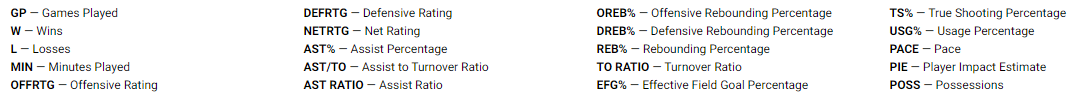

In [40]:
nba.columns

Index(['RANK_ID', 'PLAYER', 'TEAM', 'AGE', 'GP', 'W', 'L', 'MIN', 'OFFRTG',
       'DEFRTG', 'NETRTG', 'AST%', 'AST/TO', 'AST RATIO', 'OREB%', 'DREB%',
       'REB%', 'TO RATIO', 'EFG%', 'TS%', 'USG%', 'PACE', 'PIE', 'POSS'],
      dtype='object')

In [41]:
nba_raw = nba[[
   'PLAYER', 'MIN',
   'REB%', 'EFG%', 'TS%', 'USG%',
   'GP', 'AGE', 'W', 'L', 'AST%'
]]

nba = nba_raw[[
   'PLAYER', 'MIN',
   'REB%', 'TS%', 'AST%',
   'USG%'
]]

nba.head(3)

,PLAYER,MIN,REB%,TS%,AST%,USG%
0,Tyrese Maxey,39.7,3.8,52.2,19.3,30.0
1,Kevin Durant,38.8,8.6,67.0,15.5,27.3
2,Nikola Jokic,38.1,17.8,66.7,46.4,28.3


In [42]:
#nba = nba[nba['MIN']>= nba['MIN'].quantile(0.25)]
nba = nba[nba['MIN'] >= 18]
print(nba[['MIN']].describe().T)

     count      mean       std   min    25%   50%    75%   max
MIN  239.0  28.15523  5.383975  18.0  24.25  28.3  32.95  39.7


In [43]:
nba

,PLAYER,MIN,REB%,TS%,AST%,USG%
0,Tyrese Maxey,39.7,3.8,52.2,19.3,30.0
1,Kevin Durant,38.8,8.6,67.0,15.5,27.3
2,Nikola Jokic,38.1,17.8,66.7,46.4,28.3
3,Mikal Bridges,38.0,5.3,55.5,12.7,17.7
4,Luka Doncic,37.9,10.1,54.5,32.8,33.4
...,...,...,...,...,...,...
234,Alec Burks,18.3,4.1,74.2,13.8,10.3
235,Georges Niang,18.2,8.3,57.5,7.8,15.7
236,Dalton Knecht,18.2,5.1,59.1,9.2,15.4
237,Jeremiah Robinson-Earl,18.1,9.6,57.8,7.3,14.5


In [44]:
df = nba.copy()

In [45]:
col = 'REB%'

avg = df[col].mean()
q1 = df[col].quantile(0.25)
q3 = df[col].quantile(0.75)
top_25 = df[col].quantile(0.75)
worst_10 = df[col].quantile(0.1)
k=7

df['REB_glue'] = df[col].apply(lambda record: 'Top 25%' if record >= top_25 else ('Worst 10%' if record < worst_10 else 'Ordinary'))
df = df.sort_values('REB%', ascending=False)

fig= px.strip(df, y=col, template='simple_white', color='REB_glue', color_discrete_sequence=['royalblue', 'lightgray', 'magenta'], hover_data=['PLAYER'])
fig.update_traces(marker={'size':12, 'opacity': 0.7, 'line_width':1, 'line_color':'black'}).update_layout(width=600)
fig.add_hline(y=avg, line_dash='dash', line_color='lightskyblue', line_width=2, annotation_text='AVG', annotation_font_color='lightskyblue')
fig.add_hline(y=q1, line_dash='dash', line_color='lightskyblue', line_width=2, annotation_text='Q1', annotation_font_color='lightskyblue')
fig.add_hline(y=q3, line_dash='dash', line_color='lightskyblue', line_width=2, annotation_text='Q3', annotation_font_color='lightskyblue')
fig.add_hline(y=top_25, line_dash='dash', line_color='royalblue', line_width=2, annotation_text='Top 25%', annotation_font_color='royalblue')
fig.add_hline(y=worst_10, line_dash='dash', line_color='magenta', line_width=2, annotation_text='Worst 10%', annotation_font_color='magenta')
fig.add_shape(
            type='rect',
            x0=-1,
            x1=2,
            y0=q1,
            y1=q3,
            fillcolor='lightskyblue',  # Cor da hachura (cinza com 30% de transparência)
            opacity=0.05,
            line=dict(width=0),  # Sem linha de contorno
)
fig.update_layout(title='% REB')
fig.show()

In [46]:
col = 'TS%'

avg = df[col].mean()
q1 = df[col].quantile(0.25)
q3 = df[col].quantile(0.75)
top_25 = df[col].quantile(0.75)
worst_10 = df[col].quantile(0.1)
k=7

df['TS_glue'] = df[col].apply(lambda record: 'Top 25%' if record >= top_25 else ('Worst 10%' if record < worst_10 else 'Ordinary'))
df = df.sort_values('TS%', ascending=False)

fig= px.strip(df, y=col, template='simple_white', color='TS_glue', color_discrete_sequence=['royalblue', 'lightgray', 'magenta'], hover_data=['PLAYER'])
fig.update_traces(marker={'size':12, 'opacity': 0.7, 'line_width':1, 'line_color':'black'}).update_layout(width=600)
fig.add_hline(y=avg, line_dash='dash', line_color='lightskyblue', line_width=2, annotation_text='AVG', annotation_font_color='lightskyblue')
fig.add_hline(y=q1, line_dash='dash', line_color='lightskyblue', line_width=2, annotation_text='Q1', annotation_font_color='lightskyblue')
fig.add_hline(y=q3, line_dash='dash', line_color='lightskyblue', line_width=2, annotation_text='Q3', annotation_font_color='lightskyblue')
fig.add_hline(y=top_25, line_dash='dash', line_color='royalblue', line_width=2, annotation_text='Top 25%', annotation_font_color='royalblue')
fig.add_hline(y=worst_10, line_dash='dash', line_color='magenta', line_width=2, annotation_text='Worst 10%', annotation_font_color='magenta')
fig.add_shape(
            type='rect',
            x0=-1,
            x1=2,
            y0=q1,
            y1=q3,
            fillcolor='lightskyblue',  # Cor da hachura (cinza com 30% de transparência)
            opacity=0.05,
            line=dict(width=0),  # Sem linha de contorno
)
fig.update_layout(title='% PTS')

fig.show()

In [47]:
col = 'AST%'

avg = df[col].mean()
q1 = df[col].quantile(0.25)
q3 = df[col].quantile(0.75)
top_25 = df[col].quantile(0.75)
worst_10 = df[col].quantile(0.1)
k=7

df['AST_glue'] = df[col].apply(lambda record: 'Top 25%' if record >= top_25 else ('Worst 10%' if record < worst_10 else 'Ordinary'))
df = df.sort_values('AST%', ascending=False)

fig= px.strip(df, y=col, template='simple_white', color='AST_glue', color_discrete_sequence=['royalblue', 'lightgray', 'magenta'], hover_data=['PLAYER'])
fig.update_traces(marker={'size':12, 'opacity': 0.7, 'line_width':1, 'line_color':'black'}).update_layout(width=600)
fig.add_hline(y=avg, line_dash='dash', line_color='lightskyblue', line_width=2, annotation_text='AVG', annotation_font_color='lightskyblue')
fig.add_hline(y=q1, line_dash='dash', line_color='lightskyblue', line_width=2, annotation_text='Q1', annotation_font_color='lightskyblue')
fig.add_hline(y=q3, line_dash='dash', line_color='lightskyblue', line_width=2, annotation_text='Q3', annotation_font_color='lightskyblue')
fig.add_hline(y=top_25, line_dash='dash', line_color='royalblue', line_width=2, annotation_text='Top 25%', annotation_font_color='royalblue')
fig.add_hline(y=worst_10, line_dash='dash', line_color='magenta', line_width=2, annotation_text='Worst 20%', annotation_font_color='magenta')
fig.add_shape(
            type='rect',
            x0=-1,
            x1=2,
            y0=q1,
            y1=q3,
            fillcolor='lightskyblue',  # Cor da hachura (cinza com 30% de transparência)
            opacity=0.05,
            line=dict(width=0),  # Sem linha de contorno
)
fig.update_layout(title='% AST')

fig.show()

In [48]:
jogador = input('Enter a player name: ')
df.query(f'PLAYER == "{jogador}"')

Enter a player name: Nikola Jovic


,PLAYER,MIN,REB%,TS%,AST%,USG%,REB_glue,TS_glue,AST_glue
238,Nikola Jovic,18.0,10.2,56.9,11.8,18.3,Ordinary,Ordinary,Ordinary


In [49]:
nba.to_csv('eff_nba_players.csv', index=False)